## 1. With samtools, can you extract the first 10 reads of the Cerebellum downsampled subset BAM file?

In [1]:
### run the samtools code in Linux (not Python)
# module load SAMtools
# samtools view Cerebellum_subsampled.bam | head -10

## 2.1 What’s the total number of reads in the Cerebellum downsampled subset BAM file? (with samtools)

In [2]:
### run the samtools code in Linux (not Python)
# samtools view Cerebellum_subsampled.bam | wc -l
### the answer is 4253720

## 2.2 What’s the total number of reads in the Cerebellum downsampled subset BAM file? (with python)

In [3]:
import pysam

In [4]:
bam_file = 'Cerebellum_subsampled.bam'
sam_file = pysam.Samfile(bam_file, "rb")
count=0
for alignment in sam_file:
    count+=1
print(count)

4253720


## 3. For the Cerebellum downsampled subset, what is the cell barcode and the fragment length for the first sequencing read (i.e., the first line) in the BAM file? (with either Python or samtools)

In [5]:
sam_file = pysam.Samfile(bam_file, "rb")

for alignment in sam_file:
    print(alignment.query_name)
    print(alignment.tlen)
    break

TAATGCGCTATTAGACTTTTATGACCAACCTATCCT:623946703#0000
75


### The cell barcode is TAATGCGCTATTAGACTTTTATGACCAACCTATCCT

In [6]:
sam_file = pysam.Samfile(bam_file, "rb")

for alignment in sam_file:
    queryname=alignment.query_name
    print(queryname.split(':')[0])
    break

TAATGCGCTATTAGACTTTTATGACCAACCTATCCT


## 4. For the Cerebellum downsampled subset, visualize the fragment length distribution at the bulk level.

In [7]:
import pysam
import collections
import matplotlib.pyplot as plt

In [8]:
sam_file = pysam.Samfile(bam_file, "rb")

insert_sizes = {}

read_names = set()

for alignment in sam_file:
    # Don't count R1 and R2 twice
    if alignment.query_name in read_names:
        continue
    else:
        read_names.add(alignment.query_name)

    # Get the insert size
    insert_size = abs(alignment.tlen)

    # Discount inferred insert sizes over 1000
    if insert_size >= 1000:
        continue
    if insert_size not in insert_sizes.keys():
        insert_sizes[insert_size]=1
    else:
        insert_sizes[insert_size]+=1

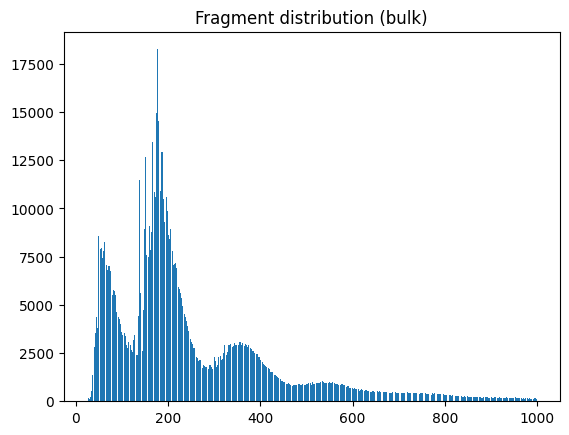

In [9]:
plt.bar(insert_sizes.keys(), insert_sizes.values())
plt.title('Fragment distribution (bulk)')
plt.show()

## 5. For the Cerebellum downsampled subset, visualize the fragment length distribution for cell with barcode as TAATGCGCTTGGCAAGCCCAATGAGTCCCCTATCCT, which is the 3rd cell that appears in this BAM file.

### Here the script can help us visualize any cell of interest

In [10]:
sam_file = pysam.Samfile(bam_file, "rb")

insert_sizes = {}

read_names = set()

for alignment in sam_file:
    # Don't count R1 and R2 twice
    if alignment.query_name in read_names:
        continue
    else:
        read_names.add(alignment.query_name)

    # Get the insert size
    insert_size = abs(alignment.tlen)

    # Discount inferred insert sizes over 1000
    if insert_size >= 1000:
        continue

    # Track stats (read names come in the format cellid:other_text)
    cell_name = alignment.query_name.split(':')[0]

    cell_insert_size_distribution = insert_sizes.get(cell_name, collections.Counter())

    cell_insert_size_distribution[insert_size] += 1
    insert_sizes[cell_name] = cell_insert_size_distribution

In [11]:
# Let's check the 3rd cell
cell = list(insert_sizes.keys())[2]
print(cell)

TAATGCGCTTGGCAAGCCCAATGAGTCCCCTATCCT


In [12]:
counts = insert_sizes[cell]
print(counts)

Counter({177: 55, 176: 50, 187: 44, 152: 44, 167: 44, 175: 42, 151: 42, 172: 42, 169: 42, 173: 41, 186: 39, 178: 39, 168: 38, 171: 36, 179: 36, 166: 35, 149: 34, 181: 34, 160: 33, 185: 33, 150: 31, 165: 30, 174: 30, 180: 30, 183: 30, 194: 30, 189: 30, 170: 29, 182: 28, 197: 28, 139: 27, 138: 27, 188: 27, 153: 27, 202: 26, 201: 26, 161: 26, 190: 25, 162: 25, 207: 25, 200: 24, 205: 23, 159: 23, 51: 23, 54: 23, 217: 22, 164: 22, 198: 22, 63: 21, 163: 21, 184: 21, 196: 21, 137: 21, 203: 21, 214: 21, 148: 20, 58: 20, 221: 20, 195: 20, 62: 20, 140: 20, 72: 20, 192: 19, 199: 19, 49: 19, 158: 19, 206: 19, 208: 18, 218: 18, 61: 18, 157: 18, 209: 18, 46: 18, 64: 17, 55: 17, 57: 17, 222: 17, 67: 17, 191: 17, 70: 17, 56: 17, 216: 17, 213: 17, 44: 17, 212: 17, 78: 17, 210: 16, 193: 16, 75: 16, 74: 16, 211: 15, 225: 15, 219: 15, 50: 15, 66: 15, 68: 15, 321: 15, 85: 15, 155: 14, 227: 14, 204: 14, 215: 14, 92: 14, 60: 14, 83: 14, 45: 13, 237: 13, 84: 13, 226: 13, 314: 13, 224: 13, 65: 13, 154: 13, 47:

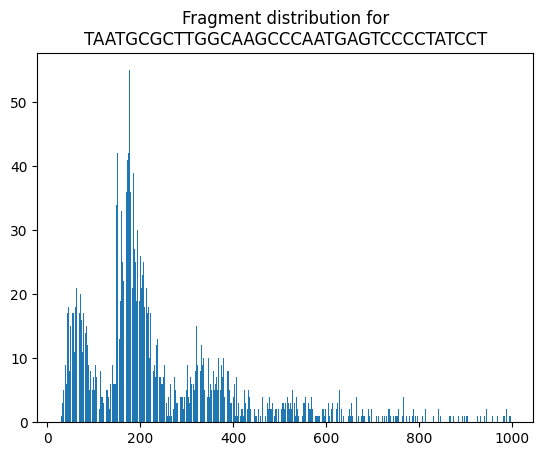

In [13]:
plt.bar(counts.keys(), counts.values())
plt.title('Fragment distribution for\n'+str(cell))
plt.show()

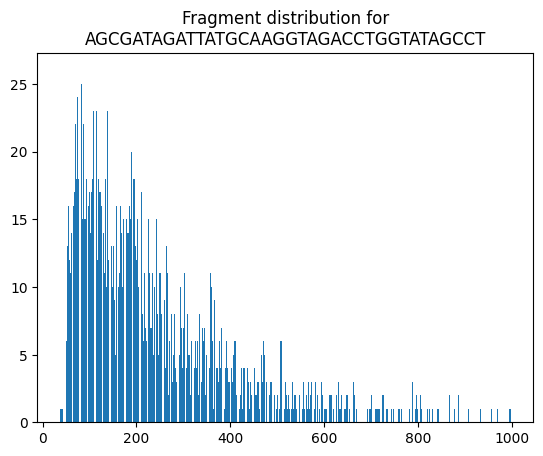

In [14]:
# Let's check the 4th cell
cell = list(insert_sizes.keys())[3]
counts = insert_sizes[cell]
plt.bar(counts.keys(), counts.values())
plt.title('Fragment distribution for\n'+str(cell))
plt.show()

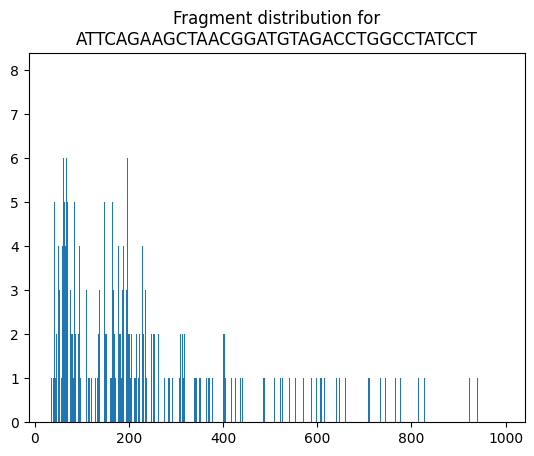

In [15]:
# Let's check the 21st cell
cell = list(insert_sizes.keys())[20]
counts = insert_sizes[cell]
plt.bar(counts.keys(), counts.values())
plt.title('Fragment distribution for\n'+str(cell))
plt.show()

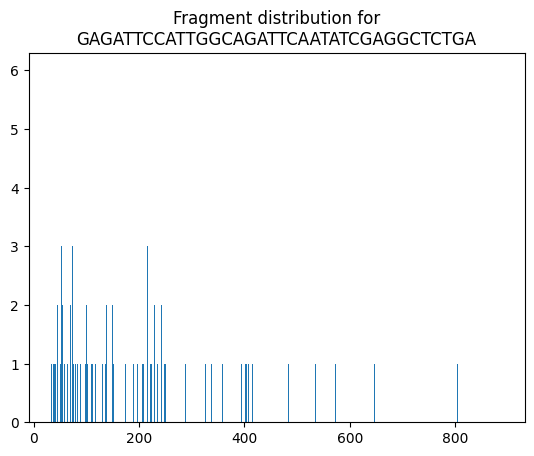

In [16]:
# Let's check the 221st cell
cell = list(insert_sizes.keys())[220]
counts = insert_sizes[cell]
plt.bar(counts.keys(), counts.values())
plt.title('Fragment distribution for\n'+str(cell))
plt.show()

## An sample of preparing 5% downsampled subset for LargeIntestineA_62816.bam with samtools. Replace 42.05 with 42.1 if you want a 10% downsampled subset .

In [17]:
### run the samtools code in Linux (not Python)
# samtools view -bs 42.05 LargeIntestineA_62816.bam > LargeIntestineA_subsampled.bam

In [18]:
bam_file = 'LargeIntestineA_subsampled.bam'

In [19]:
sam_file = pysam.Samfile(bam_file, "rb")

insert_sizes = {}

read_names = set()

for alignment in sam_file:
    # Don't count R1 and R2 twice
    if alignment.query_name in read_names:
        continue
    else:
        read_names.add(alignment.query_name)

    # Get the insert size
    insert_size = abs(alignment.tlen)

    # Discount inferred insert sizes over 1000
    if insert_size >= 1000:
        continue
    if insert_size not in insert_sizes.keys():
        insert_sizes[insert_size]=1
    else:
        insert_sizes[insert_size]+=1

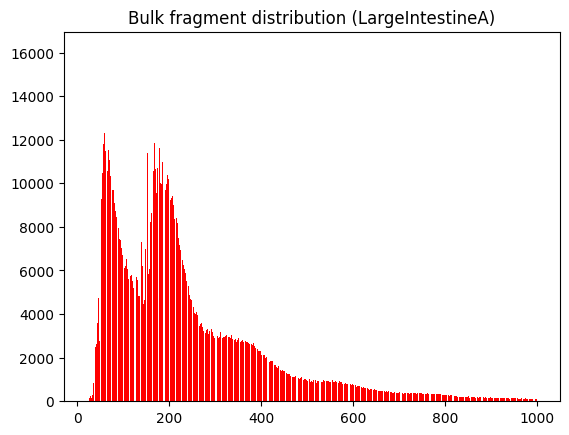

In [20]:
plt.bar(insert_sizes.keys(), insert_sizes.values(), color='red')
plt.title('Bulk fragment distribution (LargeIntestineA)')
plt.show()

In [21]:
sam_file = pysam.Samfile(bam_file, "rb")

insert_sizes = {}

read_names = set()

for alignment in sam_file:
    # Don't count R1 and R2 twice
    if alignment.query_name in read_names:
        continue
    else:
        read_names.add(alignment.query_name)

    # Get the insert size
    insert_size = abs(alignment.tlen)

    # Discount inferred insert sizes over 1000
    if insert_size >= 1000:
        continue

    # Track stats (read names come in the format cellid:other_text)
    cell_name = alignment.query_name.split(':')[0]

    cell_insert_size_distribution = insert_sizes.get(cell_name, collections.Counter())

    cell_insert_size_distribution[insert_size] += 1
    insert_sizes[cell_name] = cell_insert_size_distribution

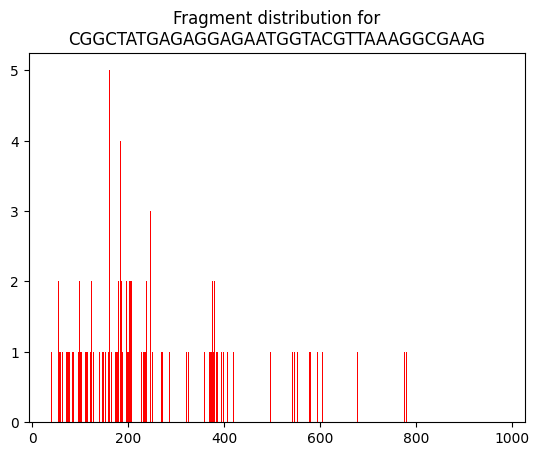

In [22]:
cell = list(insert_sizes.keys())[3]
counts = insert_sizes[cell]
plt.bar(counts.keys(), counts.values(), color='red')
plt.title('Fragment distribution for\n'+str(cell))
plt.show()

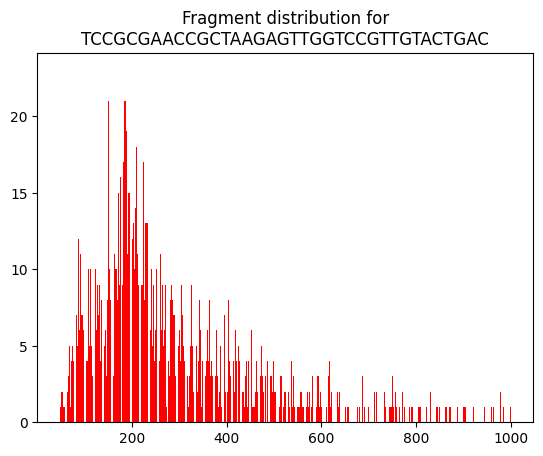

In [23]:
cell = list(insert_sizes.keys())[5]
counts = insert_sizes[cell]
plt.bar(counts.keys(), counts.values(), color='red')
plt.title('Fragment distribution for\n'+str(cell))
plt.show()

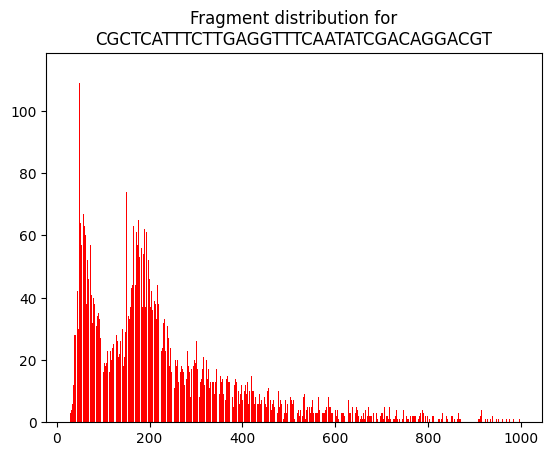

In [24]:
cell = list(insert_sizes.keys())[90]
counts = insert_sizes[cell]
plt.bar(counts.keys(), counts.values(), color='red')
plt.title('Fragment distribution for\n'+str(cell))
plt.show()